# Tensorflow Datasets

Tensorflow Datasets provides a collection of datasets ready to use with Tensorflow.

It handles downloading and preparing the data and constructing a [tf.data.Datasets](https://www.tensorflow.org/api_docs/python/tf/data/Dataset).

In [ ]:
!pip install tensorflow-datasets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

%matplotlib inline

tf.__version__

'2.0.0'

## List the avaliable datasets

In [ ]:
# See available datasets
tfds.list_builders()

## High-Level API: tf.load

[tf.load](https://www.tensorflow.org/datasets/api_docs/python/tfds/load) is a convenience method that's the simplest way to build and load [tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset).

In [4]:
# Load a given dataset by name, along with the DatasetInfo
mnist_data, info = tfds.load("mnist", with_info=True, shuffle_files=True)
# specify the version of the datasets
#mnist = tfds.load("mnist:1.*.*")

mnist_train, mnist_test = mnist_data['train'], mnist_data['test']
assert isinstance(mnist_train, tf.data.Dataset)
assert info.features['label'].num_classes == 10
assert info.splits['train'].num_examples == 60000

mnist_train

<_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

## Feature dictionaries

All `tfds` datasets contain feature dictionaries mapping feature names to Tensor values.

A typical dataset, like `MNIST`, will have 2 keys: `"image"` and `"label"`.

(28, 28, 1)
Label: 9


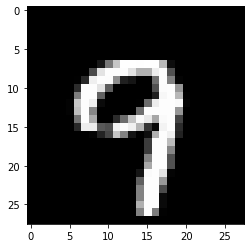

In [5]:
mnist_example, = mnist_train.take(1)
image, label = mnist_example["image"], mnist_example["label"]

# Tensor to numpy: tensor.numpy()
print(image.numpy().shape)

print("Label: {}".format(label.numpy()))
plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap='gray')

## Input pipelines

Once you have a [tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) object, it's simple to define the rest of an input pipeline suitable for model training by using the [tf.data API](https://www.tensorflow.org/guide/datasets).

Here we'll repeat the dataset so that we have an infinite stream of examples, shuffle, and create batches of 32.

- shuffle(buffer_size): 

    If your dataset contains 10,000 elements but buffer_size is set to 1,000, then shuffle will initially select a random element from only the first 1,000 elements in the buffer. Once an element is selected, its space in the buffer is replaced by the next (i.e. 1,001-st) element, maintaining the 1,000 element buffer.


In [6]:
mnist_train = mnist_train.repeat().shuffle(1024).batch(32)

# prefetch will enable the input pipeline to asynchronously fetch batches while 
# your model is training.
mnist_train = mnist_train.prefetch(tf.data.experimental.AUTOTUNE)

# Now you could loop over batches of the dataset and train
# for batch in mnist_train:
#   ...

## DatasetBuilder and DatasetInfo

### DatasetBuilder

[tf.load](https://www.tensorflow.org/datasets/api_docs/python/tfds/load) is really a thin convenience wrapper around `DatasetBuilder`.

In [7]:
mnist_builder = tfds.builder("mnist")
mnist_builder.download_and_prepare()
mnist_train = mnist_builder.as_dataset(split=tfds.Split.TRAIN)
mnist_train

W1002 16:39:00.687273 140509647685440 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


<_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

### DatasetInfo

After generation, the builder contains useful information on the dataset.

In [8]:
info = mnist_builder.info
print(info)
print("--------------------------------------------------------------------------")
print(info.features)
print(info.features["label"].num_classes)
print(info.features["label"].names)

tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=['https://storage.googleapis.com/cvdf-datasets/mnist/'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

--------------------------------------------------------------------------
FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_cl